**Estadística Aplicada**

**Tercer Parcial - Parte Práctica**

*Nombre: Alexandra Guadalupe Valdez Mireles*

*Matrícula: 1910361*

*Grupo: 44*

In [1]:
## Librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
## Importar funciones de statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict 
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## Importar pmdarima para identificar orden del proceso
import pmdarima as pm 

In [56]:
## Importar Datos
df_metro = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/datos_metrorrey.csv')

In [57]:
## Observar primeros datos
df_metro.head()

,mes,miles de pasajeros,ingresos (miles de pesos)
0,1995/01,3439.0,3240.0
1,1995/02,2879.0,3623.0
2,1995/03,3103.0,3990.0
3,1995/04,3491.0,3321.0
4,1995/05,3109.0,3777.0


In [58]:
## Observar últimos datos
df_metro.tail()

,mes,miles de pasajeros,ingresos (miles de pesos)
339,2023/04,9523.669,38799.657
340,2023/05,11891.646,58511.798
341,2023/06,10657.712,55684.063
342,2023/07,10894.497,56378.304
343,2023/08,12201.982,57821.901


In [59]:
## Muestre de qué tipo son las variables del dataframe
df_metro.dtypes

mes                           object
miles de pasajeros           float64
ingresos (miles de pesos)    float64
dtype: object

In [60]:
## Revise que no haya missing values
df_metro.isnull().sum()

mes                          0
miles de pasajeros           0
ingresos (miles de pesos)    0
dtype: int64

In [61]:
## Cersiorarse que exista una variable fecha, que sea el index, y tenga una frecuencia asignada
df_metro['mes'] = pd.to_datetime(df_metro['mes'], format='%Y/%m')
df_metro = df_metro.set_index('mes')
df_metro = df_metro.asfreq('MS')

In [94]:
## Análisis exploratorio. b) Número de observaciones 


(344, 4)

In [28]:
## Análisis exploratorio. b) Número de observaciones 
print(f'Son: {df_metro.count()} observaciones')

Son: miles de pasajeros           344
ingresos (miles de pesos)    344
dtype: int64 observaciones


In [99]:
## Análisis exploratorio. c) Valor mínimo y valor máximo
print('El valor mínimo del número de pasajeros es:',df_metro['miles de pasajeros'].min(), 'y el valor máximo es:',df_metro['miles de pasajeros'].max())

El valor mínimo del número de pasajeros es: 2397.0 y el valor máximo es: 17534.523


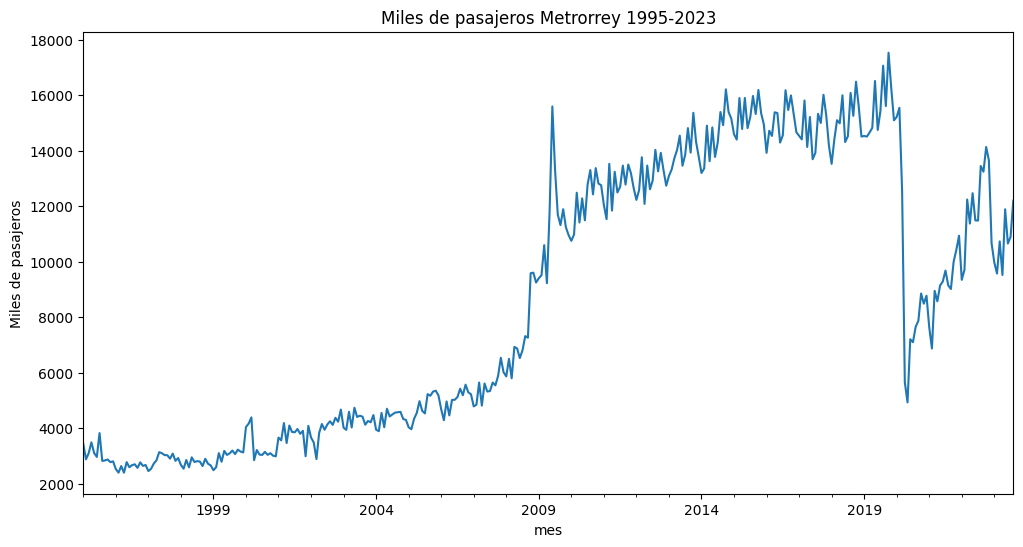

In [100]:
## Graficar la serie de miles de pasajeros
df_metro['miles de pasajeros'].plot(figsize=(12,6))
plt.title('Miles de pasajeros Metrorrey 1995-2023')
plt.xlabel('mes')
plt.ylabel('Miles de pasajeros')
plt.show()

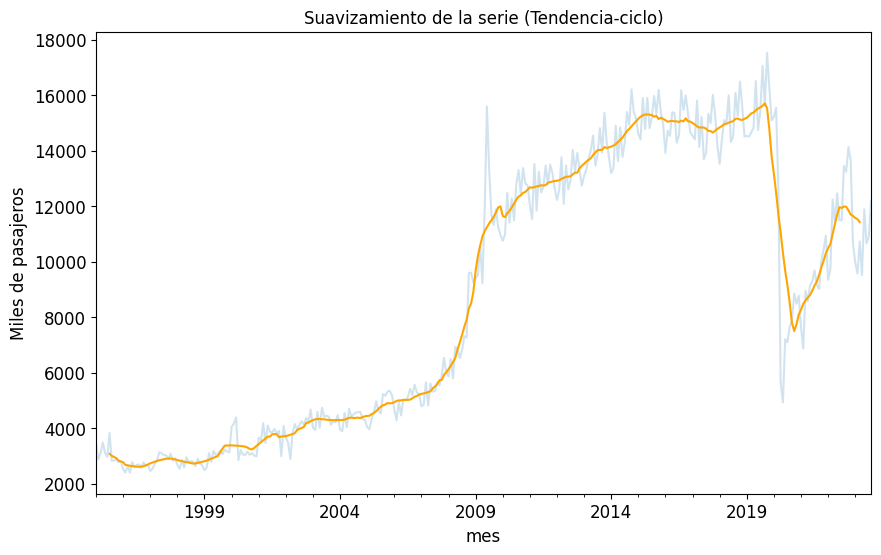

In [115]:
df_metro['PMC'] = df_metro['miles de pasajeros'].rolling(12, center=True).mean()
df_metro['miles de pasajeros'].plot(alpha=0.2)
df_metro['PMC'].plot(color='orange')
plt.title('Suavizamiento de la serie (Tendencia-ciclo)')
plt.ylabel('Miles de pasajeros');

In [63]:
ets = seasonal_decompose(df_metro['miles de pasajeros'], model='mul')

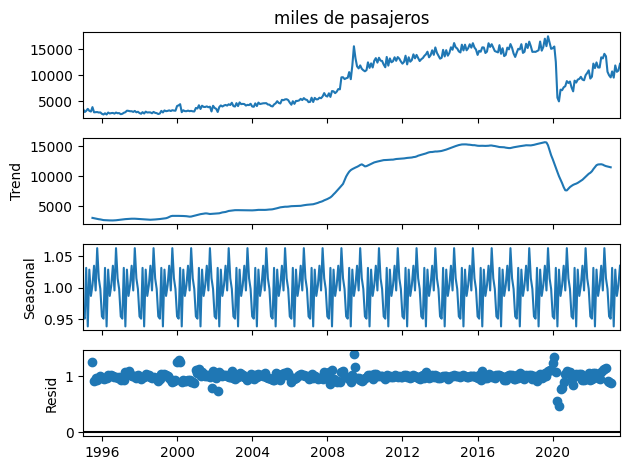

In [64]:
ets.plot()
plt.show()

In [70]:
## Prueba de raíz unitaria a la serie original
prueba_adf = adfuller(df_metro['miles de pasajeros'])
pvalue = prueba_adf[1]
pvalue.round(2)

0.58

No rechazamos Ho, significa que miles de pasajeros es una serie no estacionaria.

In [71]:
## Aplica primeras diferencias
df_metro['pasajeros_diff'] = df_metro['miles de pasajeros'].diff()

In [72]:
## Prueba de raíz unitaria
prueba_adf1 = adfuller(df_metro['pasajeros_diff'].dropna())
pvalue1 = prueba_adf1[1]
pvalue1.round(2)

0.0

Rechazamos Ho, significa que las primeras diferencias de miles de pasajeros es un proceso estacionario.

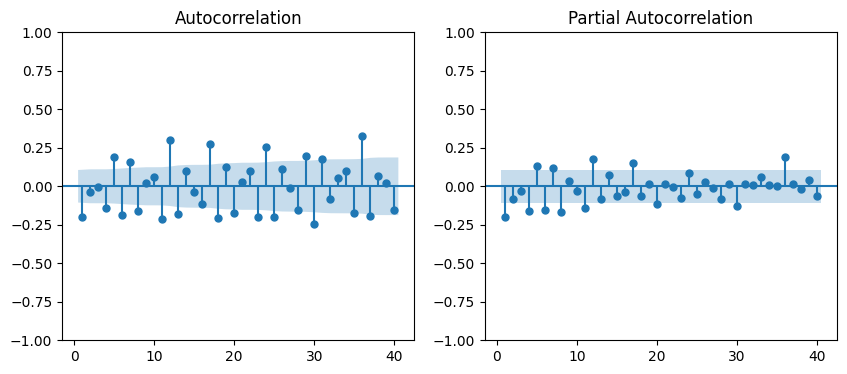

In [73]:
## Gráficas de correlación
ig, ax = plt.subplots(1,2, figsize=(10,4))
## 1er subgráfica
plot_acf(df_metro['pasajeros_diff'].dropna(), zero=False, lags=40, ax=ax[0])
## 2da subgráfica
plot_pacf(df_metro['pasajeros_diff'].dropna(), zero=False, lags=40, ax=ax[1])
plt.show()

In [74]:
## Identificar el orden del ARIMA
pm.auto_arima(df_metro['miles de pasajeros'],
              start_p=1,start_q=1,
              max_p=10,max_q=10,
              ic='aic',
              seasonal=True,
              m=12,
              start_P=1,start_Q=1,
              max_P=7,max_Q=7)

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [75]:
## Identificar el orden del ARIMA
pm.auto_arima(df_metro['miles de pasajeros'],
              start_p=1,start_q=1,
              max_p=10,max_q=10,
              ic='bic',
              seasonal=True,
              m=12,
              start_P=1,start_Q=1,
              max_P=7,max_Q=7)

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [76]:
## Identificar el orden del ARIMA
pm.auto_arima(df_metro['miles de pasajeros'],
              start_p=1,start_q=1,
              max_p=10,max_q=10,
              ic='hqic',
              seasonal=True,
              m=12,
              start_P=1,start_Q=1,
              max_P=7,max_Q=7)

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [77]:
## Identificar el orden del ARIMA
pm.auto_arima(df_metro['miles de pasajeros'],
              start_p=1,start_q=1,
              max_p=10,max_q=10,
              ic='oob',
              seasonal=True,
              m=12,
              start_P=1,start_Q=1,
              max_P=7,max_Q=7)

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [78]:
## Estimar el modelo ARIMA 
model = ARIMA(df_metro['miles de pasajeros'],
              order=(2,1,0),
              seasonal_order=(1,0,1,12))
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                 miles de pasajeros   No. Observations:                  344
Model:             ARIMA(2, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -2775.293
Date:                            Fri, 03 Nov 2023   AIC                           5560.585
Time:                                    18:55:36   BIC                           5579.774
Sample:                                01-01-1995   HQIC                          5568.229
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0412      0.031     -1.343      0.179      -0.101       0.019
ar.L2         -0.1681      0.035   

In [79]:
df_metro['pasajeros_arima'] = results.predict()

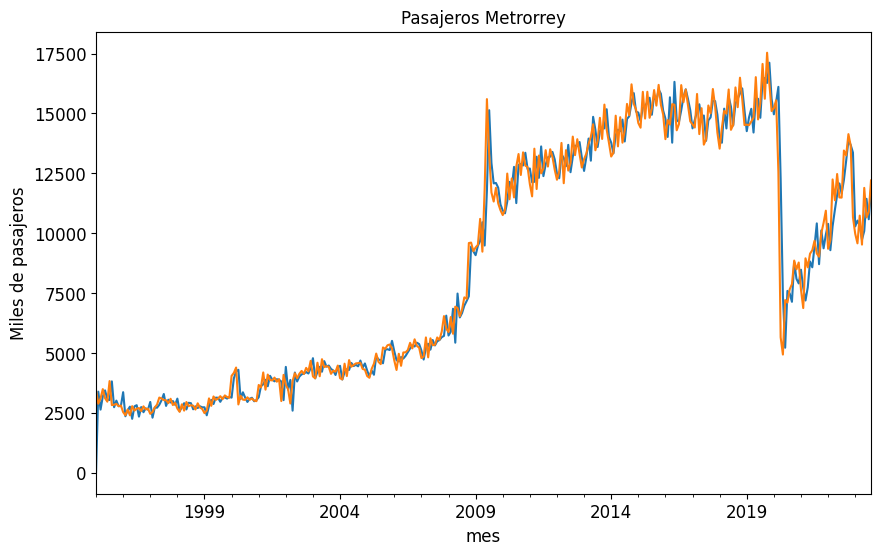

In [128]:
df_metro['pasajeros_arima'].plot()
df_metro['miles de pasajeros'].plot()
plt.title('Pasajeros Metrorrey')
plt.ylabel('Miles de pasajeros')
plt.show()

In [123]:
df_metro.tail()

,miles de pasajeros,ingresos (miles de pesos),pasajeros_diff,pasajeros_arima,PMC-6,PMC
mes,,,,,,
2023-04-01,9523.669,38799.657,-1210.233,9730.872192,NaN,NaN
2023-05-01,11891.646,58511.798,2367.977,10092.403375,NaN,NaN
2023-06-01,10657.712,55684.063,-1233.934,11435.642108,NaN,NaN
2023-07-01,10894.497,56378.304,236.785,10581.651359,NaN,NaN
2023-08-01,12201.982,57821.901,1307.485,11818.961541,NaN,NaN


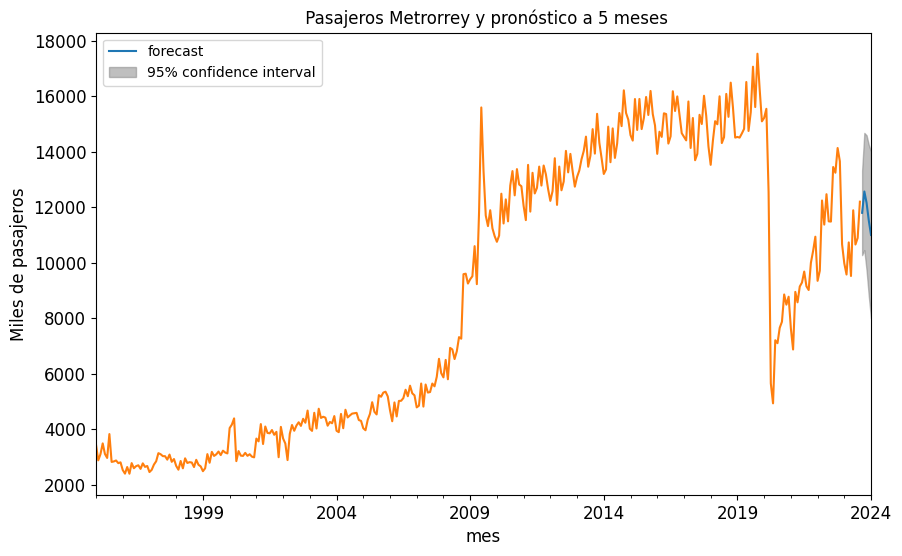

In [127]:
## Gráfica de pronóstico a 5 meses
plot_predict(results, '2023-09-01', '2024-01-01')
df_metro['miles de pasajeros'].plot()
plt.title(' Pasajeros Metrorrey y pronóstico a 5 meses')
plt.ylabel('Miles de pasajeros')
plt.show()

In [84]:
forecast = results.get_forecast(steps=5)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

In [85]:
inicio = '2023-09-01'
fin = '2024-01-01'

In [86]:
pronostico_valor = forecast_mean[inicio:fin]
pronostico_intervalos = forecast_ci.loc[inicio:fin]

In [87]:
pronostico_valor

2023-09-01    11800.347412
2023-10-01    12568.543428
2023-11-01    12161.278237
2023-12-01    11521.538431
2024-01-01    11002.534914
Freq: MS, Name: predicted_mean, dtype: float64

In [88]:
pronostico_intervalos

,lower miles de pasajeros,upper miles de pasajeros
2023-09-01,10275.525999,13325.168824
2023-10-01,10456.091672,14680.995184
2023-11-01,9727.673783,14594.882690
2023-12-01,8795.067851,14248.009011
2024-01-01,7994.331192,14010.738635


In [89]:
df_forecast = pd.DataFrame({
'pronóstico':pronostico_valor,
'límite inferior':pronostico_intervalos.iloc[:,0],
'limite superior':pronostico_intervalos.iloc[:,1]
})

In [90]:
df_forecast

,pronóstico,límite inferior,limite superior
2023-09-01,11800.347412,10275.525999,13325.168824
2023-10-01,12568.543428,10456.091672,14680.995184
2023-11-01,12161.278237,9727.673783,14594.882690
2023-12-01,11521.538431,8795.067851,14248.009011
2024-01-01,11002.534914,7994.331192,14010.738635
